# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [3]:
# Take make moons in built dataset

data_ = datasets.make_moons(100)

In [4]:
# check the dataset

data_

(array([[-9.91790014e-01,  1.27877162e-01],
        [-8.71318704e-01,  4.90717552e-01],
        [ 1.94905575e+00,  1.84891782e-01],
        [-3.45365054e-01,  9.38468422e-01],
        [ 7.15472413e-01, -4.58667853e-01],
        [ 1.71834935e+00, -1.95682551e-01],
        [-9.81559157e-01,  1.91158629e-01],
        [ 9.67948422e-01, -4.99486216e-01],
        [-2.22520934e-01,  9.74927912e-01],
        [-2.84527587e-01,  9.58667853e-01],
        [ 1.03205158e+00, -4.99486216e-01],
        [-6.72300890e-01,  7.40277997e-01],
        [ 6.23489802e-01,  7.81831482e-01],
        [ 4.62538290e-01,  8.86599306e-01],
        [ 1.61911895e-01, -4.55349012e-02],
        [ 2.05460725e-03,  4.35929780e-01],
        [-9.00968868e-01,  4.33883739e-01],
        [-1.59599895e-01,  9.87181783e-01],
        [-9.97945393e-01,  6.40702200e-02],
        [ 6.54634946e-01, -4.38468422e-01],
        [ 1.98586378e-01, -9.81105305e-02],
        [ 9.49055747e-01,  3.15108218e-01],
        [ 7.18349350e-01,  6.956

In [5]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [6]:
inputData.head()

,0,1
0,-0.991790,0.127877
1,-0.871319,0.490718
2,1.949056,0.184892
3,-0.345365,0.938468
4,0.715472,-0.458668


In [19]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,0
1,0
2,1
3,0
4,1


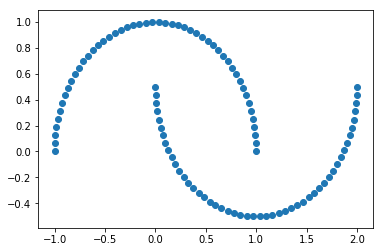

In [20]:
# create a scatter plot for inputData set
plt.scatter(inputData[0], inputData[1])


ValueError: 'c' argument has 100 elements, which is not acceptable for use with 'x' with size 100, 'y' with size 100.

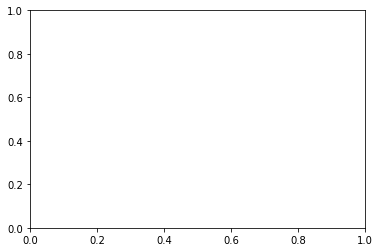

In [25]:
# create a scatter plot for inputData set with outputData color

plt.scatter(inputData[0], inputData[1], c = outputData)
#sc.scatter(np.arange(len(values)), values, c = colors/255)

In [26]:
# Call the sklearn Kmeans and make a model with 200 samples

from sklearn.cluster import KMeans

model = KMeans(n_clusters=5)
model.fit(inputData)
#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
# check for labels
KMeans(n_clusters=5)
model.labels_


array([3, 3, 1, 3, 4, 1, 3, 4, 3, 3, 4, 3, 2, 2, 0, 0, 3, 2, 3, 4, 0, 4,
       2, 3, 4, 1, 2, 2, 4, 1, 2, 2, 4, 2, 2, 1, 2, 4, 2, 2, 2, 0, 4, 0,
       0, 1, 4, 1, 2, 4, 3, 0, 2, 2, 3, 4, 0, 0, 1, 0, 2, 1, 3, 3, 3, 1,
       0, 0, 3, 3, 0, 3, 1, 4, 4, 3, 3, 0, 4, 0, 4, 1, 4, 3, 1, 4, 1, 3,
       4, 1, 1, 2, 2, 4, 1, 0, 2, 4, 2, 4])

In [28]:
from sklearn import metrics

In [29]:
# call metrics and check silhoutte score

metrics.silhouette_score(inputData, model.labels_)

0.47385281527696094

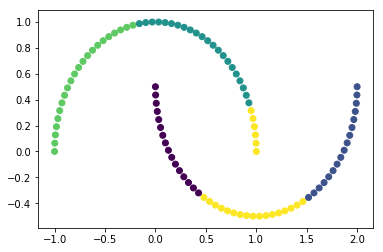

In [30]:
# create a scatter plot for inputData set with model labels color

plt.scatter(inputData[0], inputData[1], c = model.labels_)

#### finding right number of cluster

In [31]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

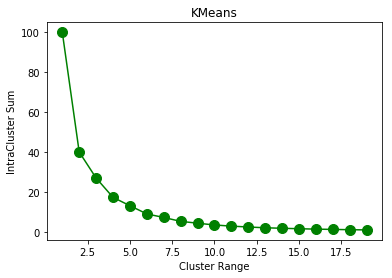

In [32]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()